In [2]:
import numpy as np
import pandas as pd
import json
from pandas import Series,DataFrame

In [4]:
db = json.load(open('pydata-book/ch07/foods-2011-10-03.json'))
len(db)

6636

In [6]:
db[0].keys()

dict_keys(['id', 'portions', 'description', 'tags', 'nutrients', 'manufacturer', 'group'])

In [9]:
db[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

In [11]:
nutrients = DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [12]:
info_keys = ['description','group','id','manufacturer']
info = DataFrame(db,columns=info_keys)
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [15]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [20]:
# see the distribution of food groups 
pd.value_counts(info.group)

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs

In [29]:
# to do some analysis on all of the nutrient data

# first step: convert each list of food nutrient to a DataFrame, add a column for the food id
nutrients = []
for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)
nutrients = pd.concat(nutrients,ignore_index=True)
print("astract of nutrients: ")
print(nutrients.head())
print("information of nutrients : ")
print(nutrients.info())

astract of nutrients: 
                   description        group units   value    id
0                      Protein  Composition     g   25.18  1008
1            Total lipid (fat)  Composition     g   29.20  1008
2  Carbohydrate, by difference  Composition     g    3.06  1008
3                          Ash        Other     g    3.28  1008
4                       Energy       Energy  kcal  376.00  1008
information of nutrients : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389355 entries, 0 to 389354
Data columns (total 5 columns):
description    389355 non-null object
group          389355 non-null object
units          389355 non-null object
value          389355 non-null float64
id             389355 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 14.9+ MB
None


In [31]:
# There are duplicates in this DataFrame
nutrients.duplicated().sum()

14179

In [33]:
# so it makes things easier to drop them:
nutrients =  nutrients.drop_duplicates()

In [34]:
# Since 'group' and 'description' is in both DataFrame objects, we can rename them to make it clear
# for food
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping,copy=False)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
food            6636 non-null object
fgroup          6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [35]:
# for nutrients
col_mapping = {'description' : 'nutrient',
               'group'       : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping,copy=False)
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 389354
Data columns (total 5 columns):
nutrient    375176 non-null object
nutgroup    375176 non-null object
units       375176 non-null object
value       375176 non-null float64
id          375176 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 17.2+ MB


In [36]:
# Whit all of this done, we're ready to merge info with nutrients:
ndata = pd.merge(nutrients,info,on='id',how='outer')
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
nutrient        375176 non-null object
nutgroup        375176 non-null object
units           375176 non-null object
value           375176 non-null float64
id              375176 non-null int64
food            375176 non-null object
fgroup          375176 non-null object
manufacturer    293054 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [37]:
ndata.ix[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [39]:
# we could a plot of median values by food group and nutrient type
result = ndata.groupby(['nutrient','fgroup'])['value'].quantile(0.5)

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.9000
                  Vegetables and Vegetable Products     2.1800
Alanine           Baby Foods                            0.0850
                  Baked Products                        0.2480
                  Beef Products                         1.5500
                  Beverages                             0.0030
                  Breakfast Cereals                     0.3110
                  Cereal Grains and Pasta               0.3730
                  Dairy and Egg Products                0.2710
                  Ethnic Foods                          1.2900
                  Fast Foods                            0.5140
                  Fats and Oils                         0.0000
                  Finfish and Shellfish Products        1.2180
                  Fruits and Fruit Juices               0.0270
                  Lamb, Veal, and Game Products         1.4080
   

/home/happyling/ProgramFile/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: order is deprecated, use sort_values(...)


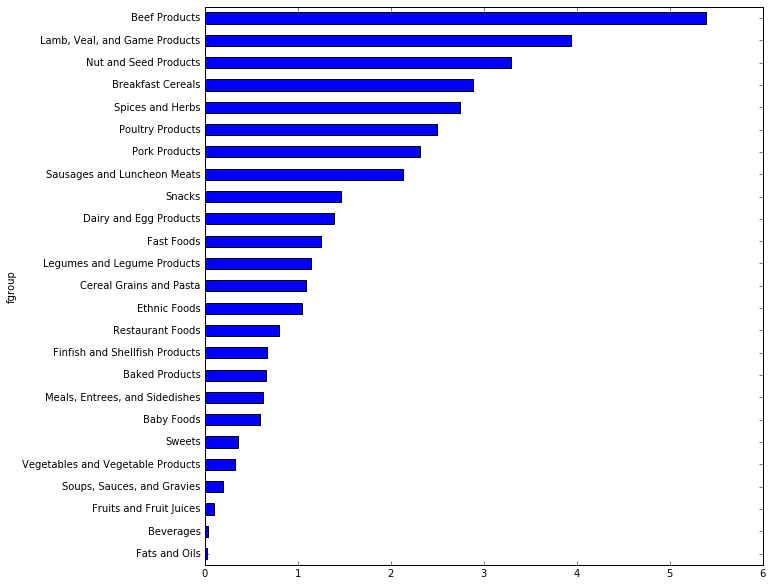

In [42]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.figure(figsize=(10,10))
result['Zinc, Zn'].order().plot(kind='barh')

In [63]:
# With a little cleverness, we can find which food is most dense in each nutrient
by_nutrient = ndata.groupby(['nutgroup','nutrient'])

get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.apply(get_maximum)[['value','food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

max_foods.ix['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 

In [60]:
by_nutrient.value.idxmax()

nutgroup     nutrient                      
Amino Acids  Alanine                           202227
             Arginine                          128415
             Aspartic acid                     158588
             Cystine                           127716
             Glutamic acid                     158589
             Glycine                           202230
             Histidine                         261289
             Hydroxyproline                    242502
             Isoleucine                        160033
             Leucine                           160034
             Lysine                            262042
             Methionine                        325782
             Phenylalanine                     160038
             Proline                           202231
             Serine                            160048
             Threonine                         160032
             Tryptophan                        266979
             Tyrosine                 

In [ ]:
## Example: 2012 Federal Election Commission Database
fec = pd.read_csv('')